# Analysis of Billionaires Data

By *Steven Arbieto*

For CS-1064 Intro to Programming in Python

Spring 2018

*"I have neither given nor received unauthorized assistance on this assignment."*

This notebook performs a simple analysis of some data about billionaires. This dataset of billionaires was compiled of decades worth of data that was built off from Forbes World's Billionaires lists from 1996-2014. The dataset contains information about the demographics, wealth, company, names, and more about many billionaires. More information about this dataset can be found at the [CORGIS site](https://think.cs.vt.edu/corgis/json/billionaires/billionaires.html)

For this analysis, I will try to answer the research question: "What is the distribution of the ages of billionaires around the world?" As a secondary analysis, I want to answer, "Where are these billionaires located?" To answer these questions, I will do the following:

1. Download a JSON file of the billionaires data
2. Print the first element of the dataset, to learn its structure
3. Extract out the ages and location information from all the billioniares.
4. Plot the distributions of ages and location, seperately.
5. Discuss the plots and their implications for society.

The data is important for understanding where a majority of wealth is being held by the top 1% and by whom. By understanding this data, policies about tax brackets, tax excemptions, etc. can be decided upon. This information also helps decide where to possibly start a buisness, as knowing where the money is, is a probably a good place to build a start up. 

# Dowloading the Data

In [2]:
import requests

url = 'https://think.cs.vt.edu/corgis/json/billionaires/billionaires.json'
billionaires = requests.get(url).json()      #Stores the json data into a variable

# Previewing the Data

In [3]:
from pprint import pprint

pprint(billionaires[0]) #Prints first billionaire from dataset

{'company': {'founded': 1968,
             'name': 'Rolaco Trading and Contracting Company',
             'relationship': 'founder',
             'sector': 'construction',
             'type': 'new'},
 'demographics': {'age': -1, 'gender': 'male'},
 'location': {'citizenship': 'Saudi Arabia',
              'country code': 'SAU',
              'gdp': 158000000000.0,
              'region': 'Middle East/North Africa'},
 'name': 'Abdul Aziz Al-Sulaiman',
 'rank': 404,
 'wealth': {'how': {'category': 'Financial',
                    'from emerging': True,
                    'industry': 'Money Management',
                    'inherited': True,
                    'was founder': True,
                    'was political': False},
            'type': 'self-made finance',
            'worth in billions': 1.0},
 'year': 1996}


# Extracting Billionaires' Ages and Locations

In [30]:
ages = [] # A list of ages for all the billionaries from the data
location = []  # A list of where the billionaires are from
for person in billionaires:
    ages.append(person['demographics']['age'])
    location.append(person['location']['country code'])

# Plotting Ages

For my primary analysis, I will create a histogram that shows the distribution of billionaires' ages.

It's important to note that the dataset did not collect all ages of billionaires, and thus has them listed with -1 age. To fix this, the dataset was scrubbed of the -1 values, thus this histogram is not fully representative of all the billionaires from the dataset.

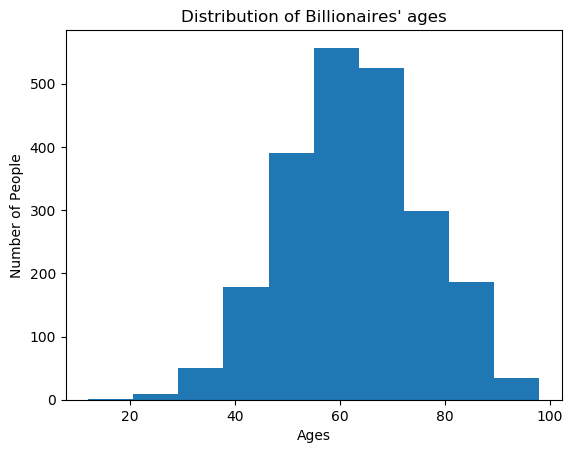

In [42]:
import matplotlib.pyplot as plt

#Scrubbing the data of -1 values
scrubbed_ages = []  # A list of ages that do not include -1.
for age in ages:
    if age != -1:
        scrubbed_ages.append(age)

plt.hist(scrubbed_ages)
plt.title("Distribution of Billionaires' ages")
plt.xlabel("Ages")
plt.ylabel("Number of People")
plt.show()

# Discussion of Billionaires' ages

The histogram above shows that most billionaires are around the ages of 50 to 80 years old. However, there are some billionaires that are very young and very old, some being as young as less than 20 years old and some as old as approximately 90.

One important thing to note, the dataset did not contain the ages of all billionaires; and for those that were not collected, their values were set to -1. Because of this, the dataset was scrubbed of the -1 ages; thus, this histogram does not fully represent all the billionaires in the dataset. There were approximately 400 people that did not have an age recorded in the dataset.

# Preparing Location Data to be Plotted

In [40]:
#Counts every country code in the data and stores it into a dictionary
country_counts = {}   #A dictionary that holds the counts of each country code
for country in location:          
    if country in country_counts:
        country_counts[country] = country_counts[country] + 1
    else:
        country_counts[country] = 1
        
#Country values correspoding to y-axis labels        
country_Xaxis = [country_counts['USA'], # 903 people        
                 country_counts['DEU'], # 160
                 country_counts['CHN'], # 153
                 country_counts['JPN'], # 96
                 country_counts['BRA'], # 81
                 country_counts['HKG'], # 77
                 country_counts['FRA'], # 72
                 country_counts['GBR']] # 65

#Country labels correspoding to x-axis values
country_Yaxis = ['USA', 'DEU', 'CHN', 'JPN', 'BRA', 'HKG', 'FRA', 'GBR'] 


# Plotting Billionaires' Locations

For my secondary analysis, I will create a bar graph showing the number of billionaries located in different countries.

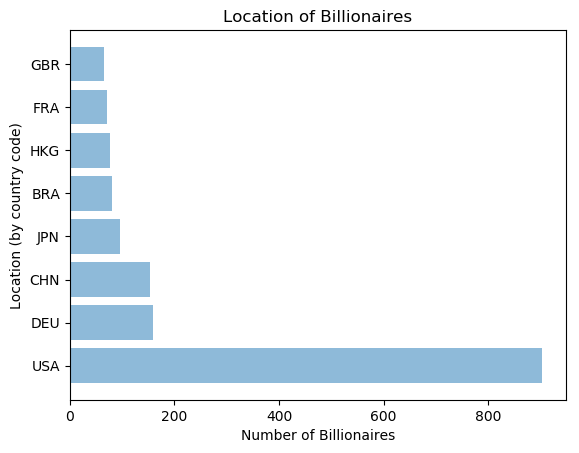

In [38]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(country_Yaxis)) # generates a list of the number of countries starting from 1 to 8. i.e. [1, 2, ..., 8]

plt.barh(y_pos, country_Xaxis, align='center', alpha=0.5)
plt.yticks(y_pos, country_Yaxis)         # Overwrties the y-axis labels with country codes.
plt.title('Location of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Location (by country code)')
plt.show()

# Discussion of Billionaires' Locations

This bar graph illustrates how many billionaires are from certain parts of the world. The bar graph shows that most billionaires are from the United States. The second country to have the most billionaires is Germany with about 160 people. It's important to note that the bar graph is only representative of the top 8 countries from the dataset. 

# Stakeholders to this Data

Stakeholders that could be interested in these results:
* Start up businesses, who would want to know where their buisness may do well. With the distribution of age, a business may be able to cater to a specific market of billioanaires, in that age range. 
* Economic advisors, who might want to know where a majority of the world's money may be held. Also, with the distribution of age, advisors may be able to tell when large sums of wealth will be turned over to the next generation of that billionaire's family. A a billionaire's company may be turned over to a younger family memeber, which in turn may effect the way certain comapnies behave towards that company. 